In [1]:
import numpy as np
import pandas as pd

In [2]:
df_data = pd.read_csv('./ipl/matches.csv')
df_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
df_data = df_data[['city', 'toss_winner', 'winner']]
df_data.head()

,city,toss_winner,winner
0,Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad
1,Pune,Rising Pune Supergiant,Rising Pune Supergiant
2,Rajkot,Kolkata Knight Riders,Kolkata Knight Riders
3,Indore,Kings XI Punjab,Kings XI Punjab
4,Bangalore,Royal Challengers Bangalore,Royal Challengers Bangalore


In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 3 columns):
city           629 non-null object
toss_winner    636 non-null object
winner         633 non-null object
dtypes: object(3)
memory usage: 15.0+ KB


In [5]:
# getting non null rows only
# checking for city names and winner only

df_data = df_data[pd.notnull(df_data.city) & pd.notnull(df_data.winner)]
df_data.head()

,city,toss_winner,winner
0,Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad
1,Pune,Rising Pune Supergiant,Rising Pune Supergiant
2,Rajkot,Kolkata Knight Riders,Kolkata Knight Riders
3,Indore,Kings XI Punjab,Kings XI Punjab
4,Bangalore,Royal Challengers Bangalore,Royal Challengers Bangalore


In [6]:
def winner(row):
    if row.toss_winner == row.winner:
        val = 'yes'
    else:
        val = 'no'
    return val

df_data['is_toss_winner_winner'] = df_data.apply(winner, axis=1)
df_data

,city,toss_winner,winner,is_toss_winner_winner
0,Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,no
1,Pune,Rising Pune Supergiant,Rising Pune Supergiant,yes
2,Rajkot,Kolkata Knight Riders,Kolkata Knight Riders,yes
3,Indore,Kings XI Punjab,Kings XI Punjab,yes
4,Bangalore,Royal Challengers Bangalore,Royal Challengers Bangalore,yes
...,...,...,...,...
631,Raipur,Royal Challengers Bangalore,Royal Challengers Bangalore,yes
632,Bangalore,Royal Challengers Bangalore,Royal Challengers Bangalore,yes
633,Delhi,Kolkata Knight Riders,Sunrisers Hyderabad,no
634,Delhi,Sunrisers Hyderabad,Sunrisers Hyderabad,yes


In [7]:
df_decision = pd.get_dummies(df_data.is_toss_winner_winner)
df_decision.head()

,no,yes
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [8]:
df_data.drop(['toss_winner', 'winner', 'is_toss_winner_winner'], axis=1, inplace=True)
df_data = pd.concat([df_data, df_decision], axis=1)
df_data.head()

,city,no,yes
0,Hyderabad,1,0
1,Pune,0,1
2,Rajkot,0,1
3,Indore,0,1
4,Bangalore,0,1


In [9]:
df_data = df_data.groupby('city').sum().reset_index()

In [10]:
df_data = df_data[['city', 'yes', 'no']]
df_data.head()

,city,yes,no
0,Abu Dhabi,5,2
1,Ahmedabad,6,6
2,Bangalore,36,28
3,Bloemfontein,2,0
4,Cape Town,4,3


In [11]:
import matplotlib.pyplot as plt

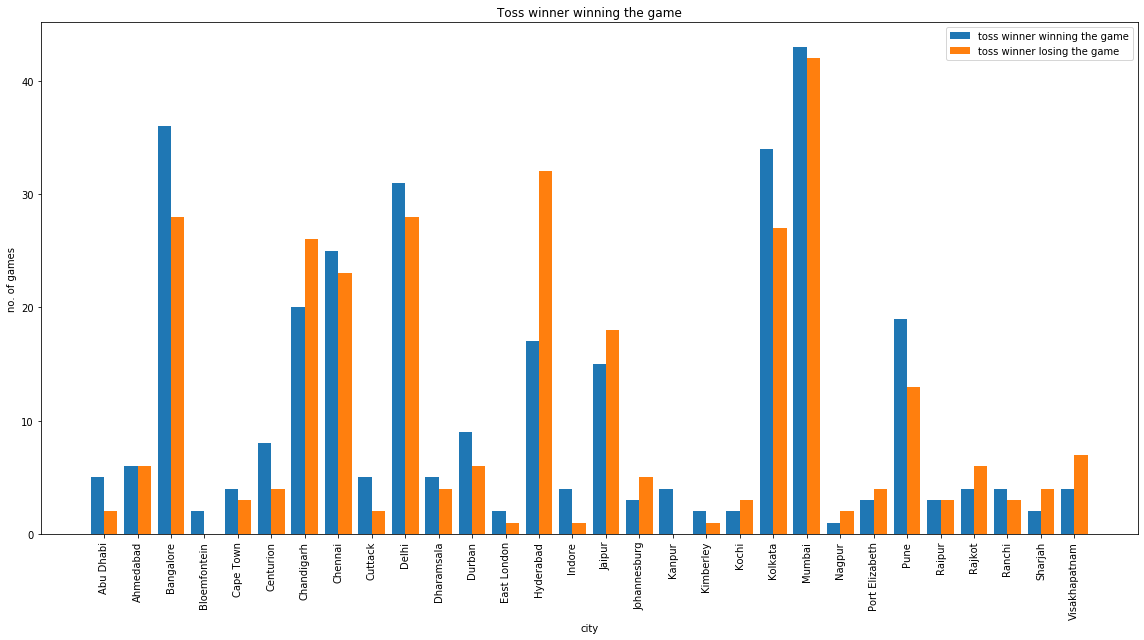

In [12]:
fig, ax = plt.subplots(figsize=(16,9))
x = np.arange(len(df_data.city))
width = 0.4

ax.bar(x - width/2, df_data.yes, width=width, label="toss winner winning the game")
ax.bar(x + width/2, df_data.no, width=width, label="toss winner losing the game")

ax.set_title("Toss winner winning the game")
ax.set_ylabel('no. of games')
ax.set_xlabel('city')
ax.set_xticklabels(df_data.city)
ax.set_xticks(x)
ax.legend(loc='upper right')

plt.xticks(rotation=90)
plt.tight_layout()